# **Overview of the data and the goal of it**

### **`The dataset is related to credit risk assessment. It comes from a financial context where a bank or credit institution needs to evaluate the risk associated with granting loans to individuals`**
### **`The primary goal of this dataset is to determine whether an applicant is a "good" or "bad" credit risk. This classification helps the credit institution decide whether to approve or reject a loan application.`**

# **Explaining the data**

**`checking_status`: Status of the individual's checking account. Values:**

**`<0`: Balance is less than 0.**

**`0<=X<200`: Balance is between 0 and 200.**

**`>=200`: Balance is 200 or more.**

**`'no checking'`: No checking account.**
#### ----------------------------
**`duration`: Duration of the credit in months. Values:**

**`Ranges from 12 to 72`.**
#### ----------------------------
**`credit_history`: History of the individual's credit. Values:**

**`'no credits/all paid'`:  No credits or all credits paid.**

**`'all paid'`: All credits have been paid.**

**`'existing paid'`: Existing credits have been paid.**

**`'delayed previously'`: Previous credits were delayed.**

**`'critical/other existing credit'`: Critical or other existing credit issues.**
#### ----------------------------
**`purpose`: The purpose of the credit. Values:**
**`'new car'`.**
**`'used car'`.**
**`'furniture/equipment'`.**
**`'radio/tv'`.**
**`'domestic appliance'`.**
**`'repairs'`.**
**`'education'`.**
**`'vacation'`.**
**`'retraining'`.**
**`'business'`.**
**`'others'`.**
#### ----------------------------
**`credit_amount`: The amount of the credit. Values:**

**`Ranges from 250 to 18424.`**
#### ----------------------------
**`savings_status`: Savings account/bonds status. Values:**

**`<100`: Savings less than 100.**

**`100<=X<500`: Savings between 100 and 500.**

**`500<=X<1000`: Savings between 500 and 1000.**

**`>=1000`: Savings greater than or equal to 1000.**

**`'no known savings'`: No known savings.**
#### ----------------------------
**`employment`: Employment duration in the current job. Values:**

**`unemployed`**

**`<1`: Less than 1 year.**

**`1<=X<4`: Between 1 and 4 years.**

**`4<=X<7`: Between 4 and 7 years.**

**`>=7`: Greater than or equal to 7 years.**
#### ----------------------------
**`installment_commitment`: The number of installment payments the applicant is committed to making. Values:**

**`Ranges from 1 to 4.`**
#### ----------------------------
**`personal_status`:  Personal status and sex. Values:**

**`'male single'`.**
**`'male div/sep'`: (divorced/separated).**
**`'male mar/wid'`: (married/widowed).**
**`'female div/dep'`: (female divorced/dependent).**
#### ----------------------------
**`other_parties`: Guarantors of the credit. Values:**
**`none`: No other parties.**
**`guarantor`: A guarantor is present.**
#### ----------------------------
**`residence_since`: Number of years at the current residence. Values:**

**`Ranges from 1 to 4.`**
#### ----------------------------
**`property_magnitude`: Type of property. Values:**

**`'real estate'`.**
**`'life insurance'`.**
**`'car'`.**
**`'no known property'`.**
#### ----------------------------
**`age`: Age of the individual. Values:**

**`Ranges from 19 to 75`.**
#### ----------------------------
**`other_payment_plans`: Values:**

**`none`.**
**`bank`.**
**`stores`.**
#### ----------------------------
**`housing`: Type of housing. Values:**

**`'own'`: Owns the house.**

**`'for free'`: Lives for free.**

**`rent`: Rent the house**
#### ----------------------------
**`existing_credits`: Number of existing credits at this bank. Values:**

**`Ranges from 1 to 4.`**
#### ----------------------------
**`job`: Job category. Values:**

**`'unskilled resident'`.**

**`'unskilled non-resident'`.**

**`'skilled'`**

**`'high qualif/self emp/mgmt'`: (highly qualified/self-employed/management).**
#### ----------------------------
**`num_dependents`: The number of dependents that the loan applicant has. Dependents typically include children or other individuals who rely on the applicant financially.**

**`Ranges from 1 to 2.`**
#### ----------------------------
**`own_telephone`: Whether the individual owns a telephone. Values:**

**`none`.**
**`yes`.**
#### ----------------------------
**`foreign_worker`: Whether the individual is a foreign worker. Values:**

**`yes`.**
**`no`.**
#### ----------------------------
**`class`: The credit risk classification.**
**`good`: Low risk.**
**`bad`: High risk.**

# **Import libraries**

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from pyECLAT import ECLAT

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
%matplotlib inline

# **Import data**

In [123]:
df1 = pd.read_csv('Credit-Dataset(3).csv')

In [124]:
pd.set_option('display.max_columns', None)
df1.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
1,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
2,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
3,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,2,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
4,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,4,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good


In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         750 non-null    object
 1   duration                750 non-null    int64 
 2   credit_history          750 non-null    object
 3   purpose                 750 non-null    object
 4   credit_amount           750 non-null    int64 
 5   savings_status          750 non-null    object
 6   employment              750 non-null    object
 7   installment_commitment  750 non-null    int64 
 8   personal_status         750 non-null    object
 9   other_parties           750 non-null    object
 10  residence_since         750 non-null    int64 
 11  property_magnitude      750 non-null    object
 12  age                     750 non-null    int64 
 13  other_payment_plans     750 non-null    object
 14  housing                 750 non-null    object
 15  existi

## The data have no null values, which is greate 😋

In [126]:
df1.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [127]:
df1[df1.duplicated() == True]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


# **A. Initial Data Exploration**

## **1. Identify Attribute Types:**
##### **1) `Nominal`: checking_status, credit_history, purpose, savings_status, personal_status, other_parties, other_payment_plans, housing, property_magnitude, own_telephone, foreign_worker, class (target variable)**
##### **2) `Ordinal Features`: employment, job**
##### **3) `Interval Features`: None of the features**
##### **4) `Ratio Features`: duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents**

## **2. Summarize Attribute Statistics:**

In [128]:
numerical_summary = df1.describe().transpose()
numerical_summary['variance'] = df1.var(numeric_only = True)
numerical_summary['range'] = numerical_summary['max'] - numerical_summary['min']
numerical_summary

,count,mean,std,min,25%,50%,75%,max,variance,range
duration,750.0,21.241333,12.287028,4.0,12.00,18.0,24.0,72.0,1.509711e+02,68.0
credit_amount,750.0,3426.126667,2981.441052,250.0,1393.00,2406.0,4162.0,18424.0,8.888991e+06,18174.0
installment_commitment,750.0,2.968000,1.117426,1.0,2.00,3.0,4.0,4.0,1.248641e+00,3.0
residence_since,750.0,2.893333,1.109172,1.0,2.00,3.0,4.0,4.0,1.230263e+00,3.0
age,750.0,35.610667,11.554383,19.0,26.25,33.0,42.0,75.0,1.335038e+02,56.0
existing_credits,750.0,1.418667,0.592046,1.0,1.00,1.0,2.0,4.0,3.505189e-01,3.0
num_dependents,750.0,1.152000,0.359260,1.0,1.00,1.0,1.0,2.0,1.290681e-01,1.0


In [129]:
df1.describe(include=['object'])

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,750,750,750,750,750,750,750,750,750,750,750,750,750,750
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,<100,1<=X<4,'male single',none,car,none,own,skilled,none,yes,good
freq,296,391,211,461,255,424,684,239,608,526,483,441,720,515


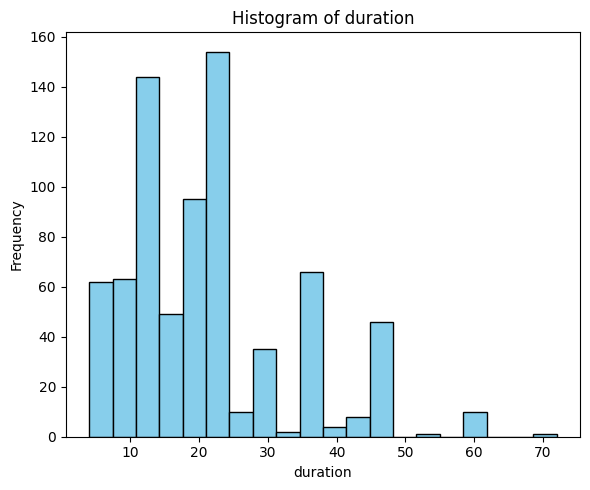

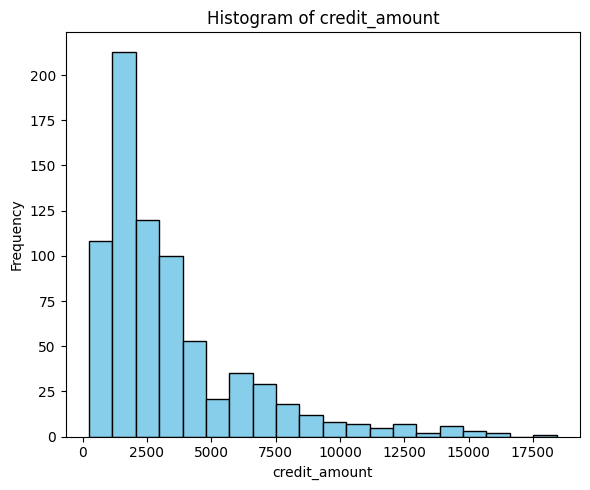

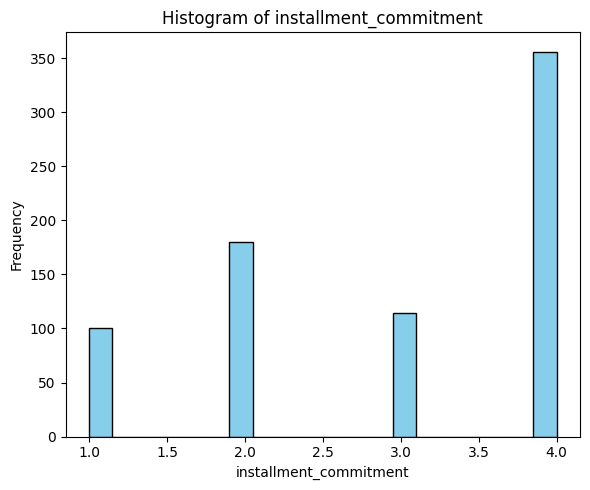

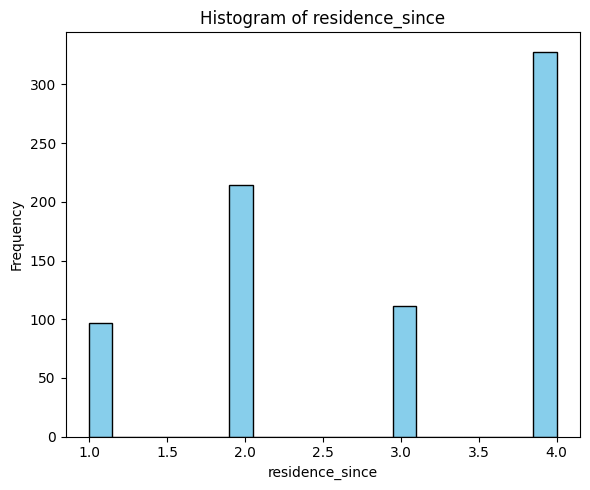

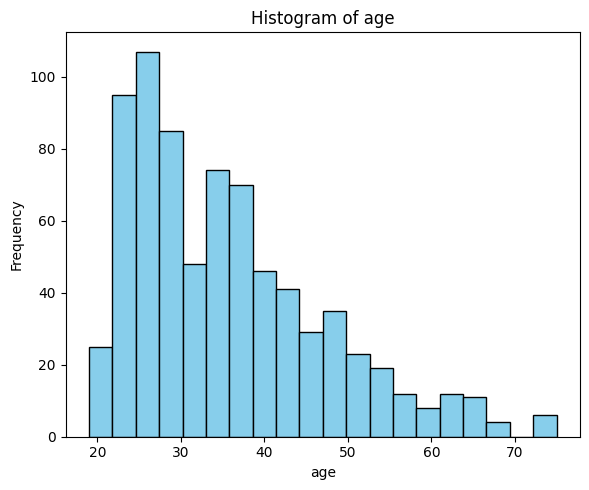

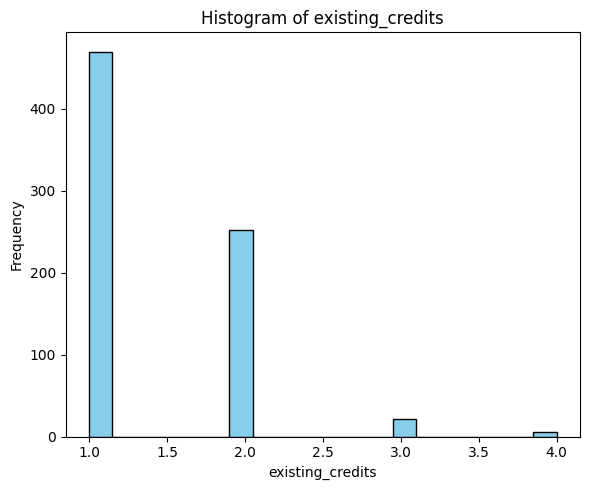

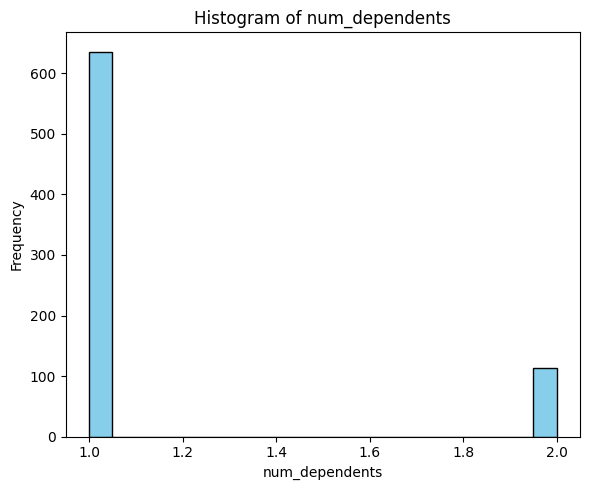

In [130]:
numerical_columns = df1.select_dtypes(include=['number']).columns

for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(6, 5))
    plt.hist(df1[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

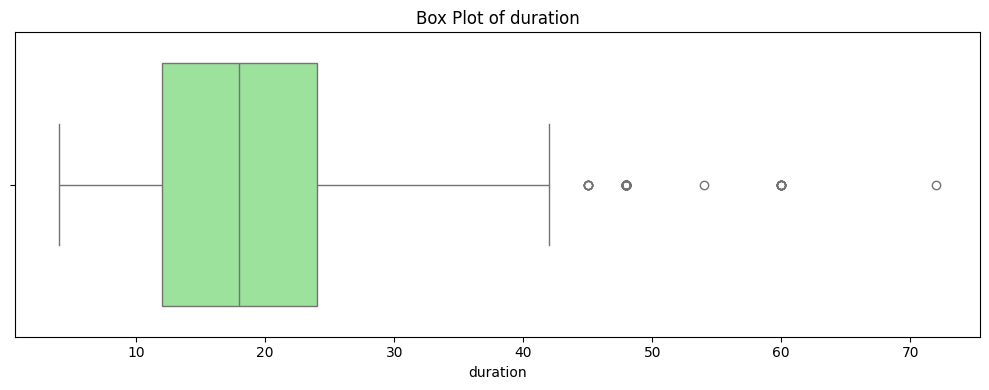

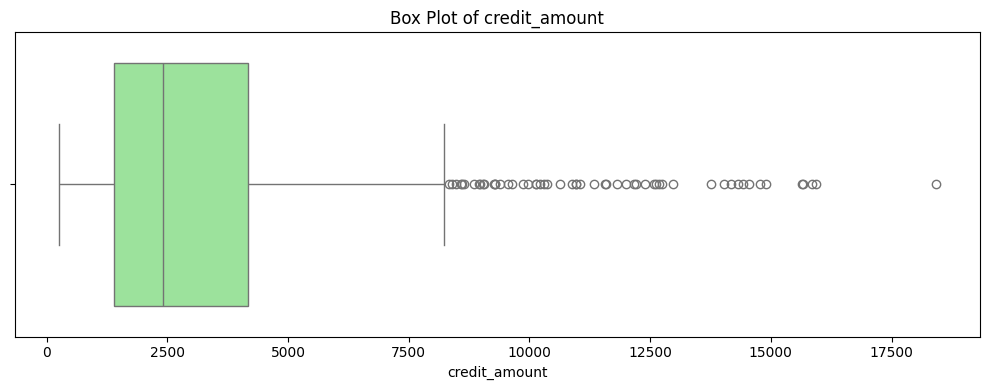

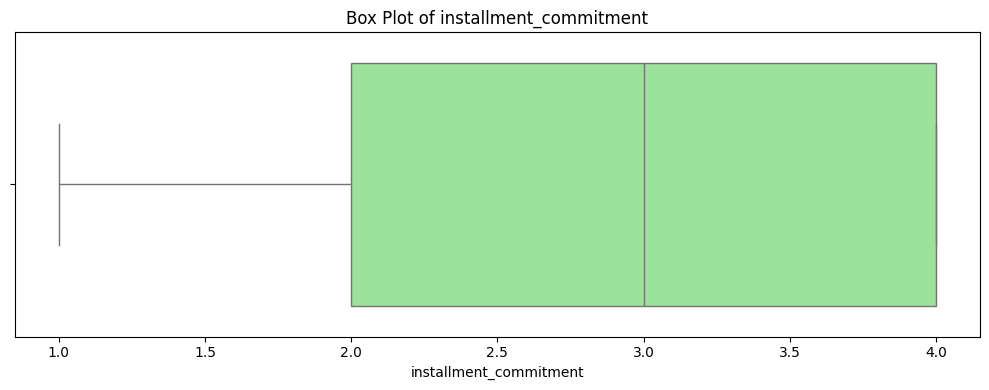

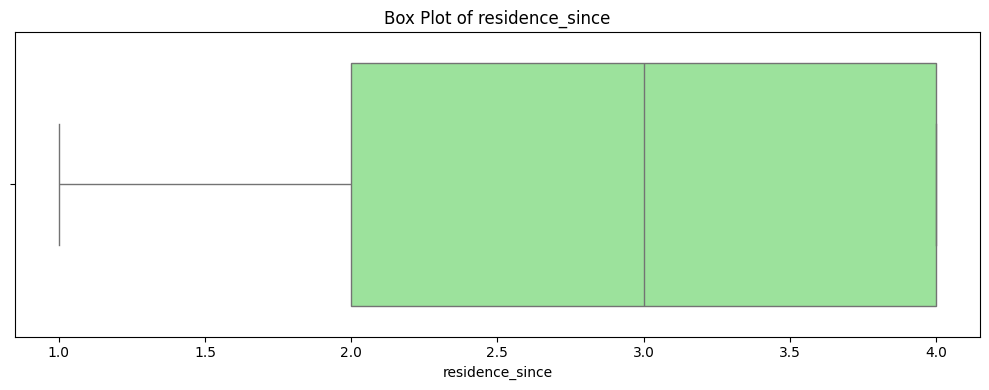

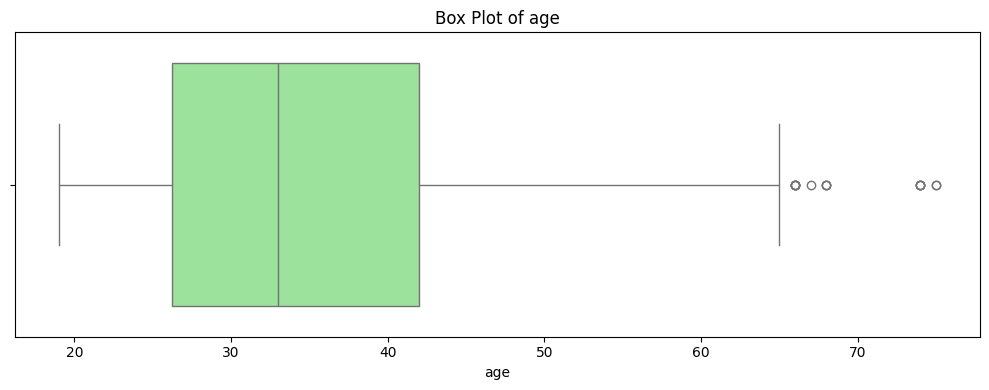

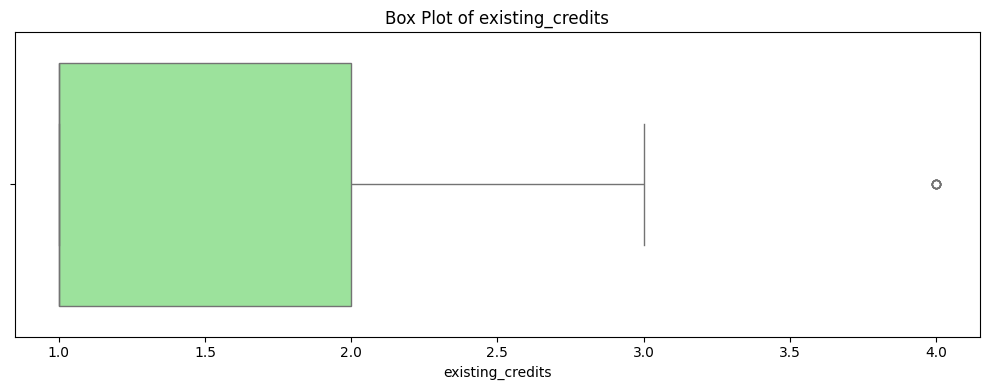

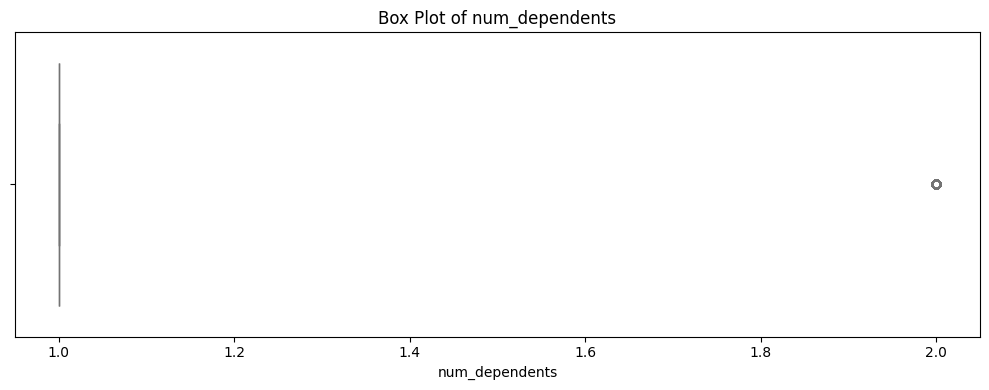

In [131]:
for i, col in enumerate(numerical_columns, 1):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df1[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

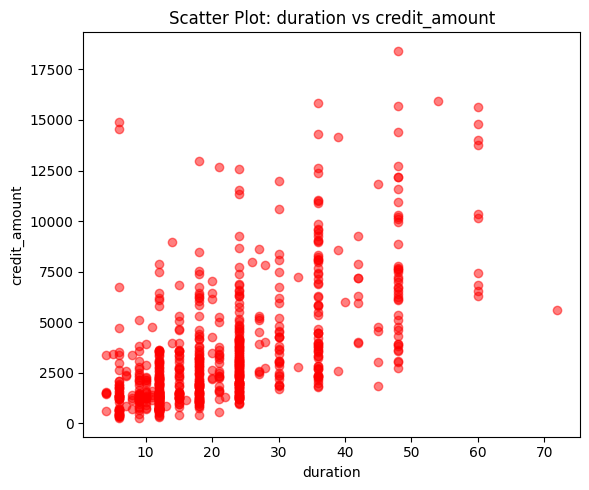

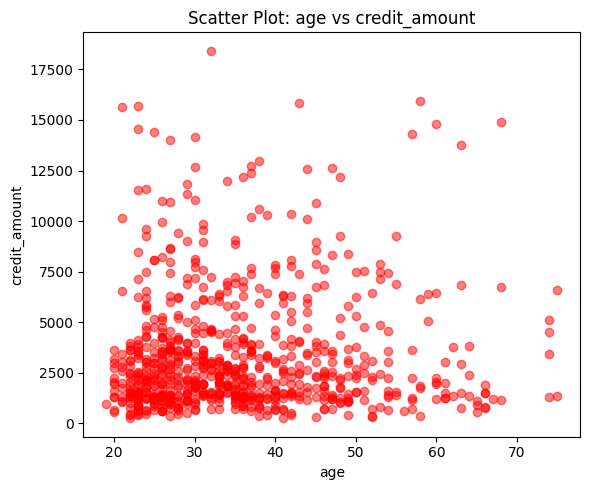

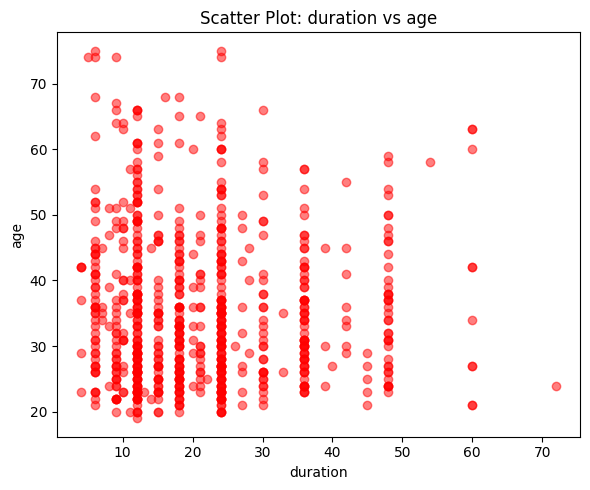

In [132]:
pairs = [('duration', 'credit_amount'), ('age', 'credit_amount'), ('duration', 'age')]
for i, (x, y) in enumerate(pairs, 1):
    plt.figure(figsize=(6, 5))
    plt.scatter(df1[x], df1[y], alpha=0.5, color='red', )
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

## **3. Outlier and Cluster Analysis:**

### **As you can see from the boxplots above, you can really observe the outliers there visually. Also, I am going to detect outliers programmatically too.**

In [133]:
outliers_dict = {}

for col in numerical_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    
    outliers_dict[col] = outliers

print(f'dataset shape: {df1.shape}')
print(f'outliers shape: {outliers.shape}')
outliers

dataset shape: (750, 21)
outliers shape: (114, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
1,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
2,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
14,'no checking',24,'existing paid',radio/tv,3430,500<=X<1000,>=7,3,'male single',none,2,car,31,none,own,1,skilled,2,yes,yes,good
16,<0,6,'existing paid',radio/tv,2647,500<=X<1000,1<=X<4,2,'male single',none,3,'real estate',44,none,rent,1,skilled,2,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,'no checking',24,'existing paid','new car',7393,<100,1<=X<4,1,'male single',none,4,'life insurance',43,none,own,1,'unskilled resident',2,none,yes,good
734,'no checking',24,'delayed previously','new car',2538,<100,>=7,4,'male single',none,4,car,47,none,own,2,'unskilled resident',2,none,yes,bad
737,<0,36,'existing paid','used car',8229,<100,1<=X<4,2,'male single',none,2,'life insurance',26,none,own,1,skilled,2,none,yes,bad
742,'no checking',12,'critical/other existing credit',education,3565,'no known savings',<1,2,'male single',none,1,'life insurance',37,none,own,2,'unskilled resident',2,none,yes,good


### **As you can see from the heatmap below and the scatter plots above, there is no strong correlation between any feature. However, the correlation between credit amount and duration is 0.63, which is not particularly strong but is better than that of the other features.**

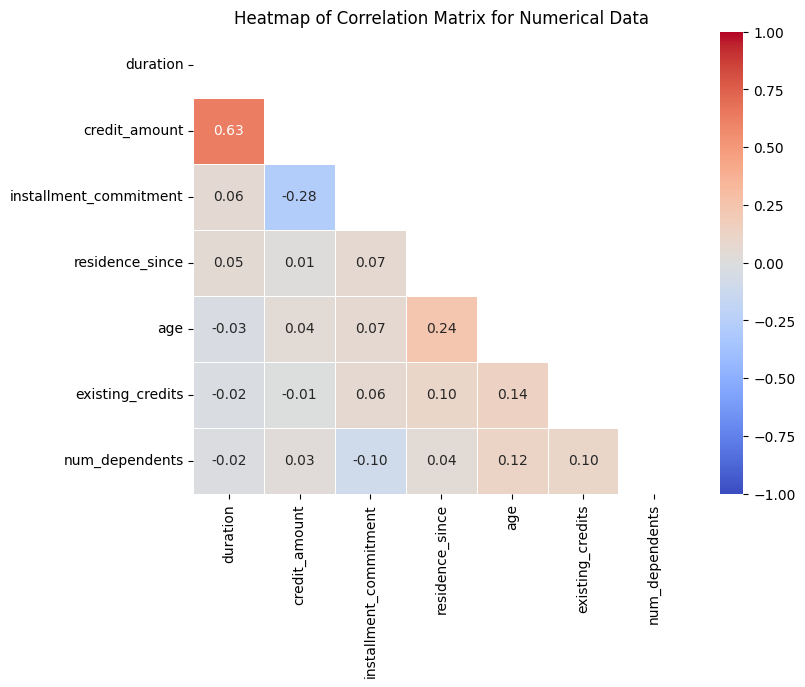

In [134]:
numerical_columns = df1.loc[:,df1.select_dtypes(include=['number']).columns]
correlation_matrix = numerical_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

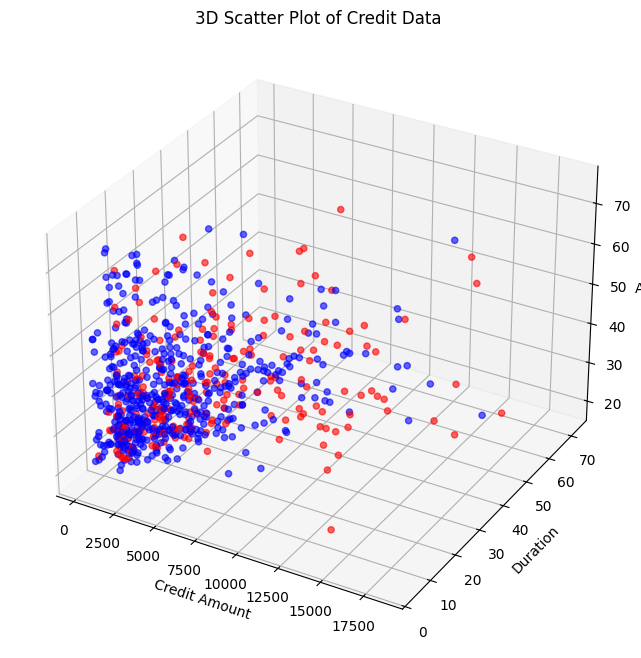

In [135]:
# Extract the relevant columns
x = df1['credit_amount']
y = df1['duration']
z = df1['age']
color = df1['class'].apply(lambda x: 'blue' if x == 'good' else 'red')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=color, alpha=0.6)

# Set labels
ax.set_xlabel('Credit Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

# Set title
ax.set_title('3D Scatter Plot of Credit Data')

# Show plot
plt.show()

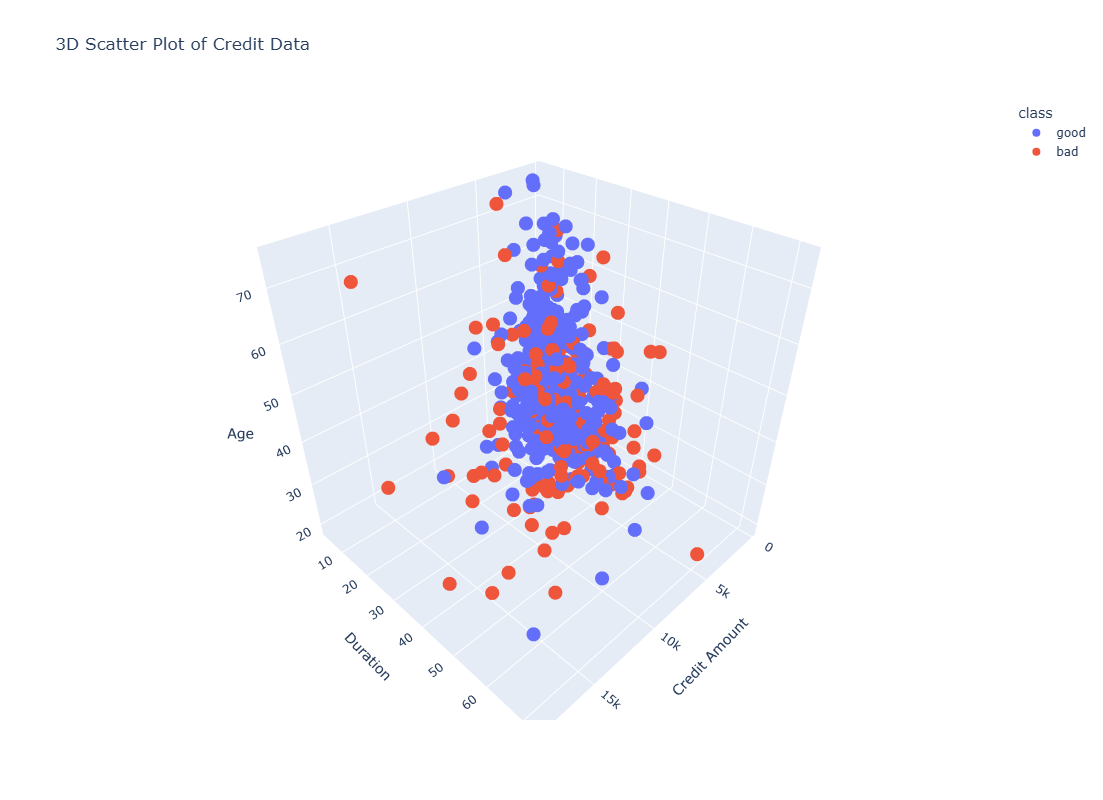

In [136]:
# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(df1, 
                    x='credit_amount', 
                    y='duration', 
                    z='age', 
                    color='class',
                    title='3D Scatter Plot of Credit Data')

# Update layout to make the plot bigger
fig.update_layout(
    width=1200,  # Set the width of the plot
    height=800,  # Set the height of the plot
    scene=dict(
        xaxis_title='Credit Amount',
        yaxis_title='Duration',
        zaxis_title='Age'
    )
)

# Show plot
fig.show()

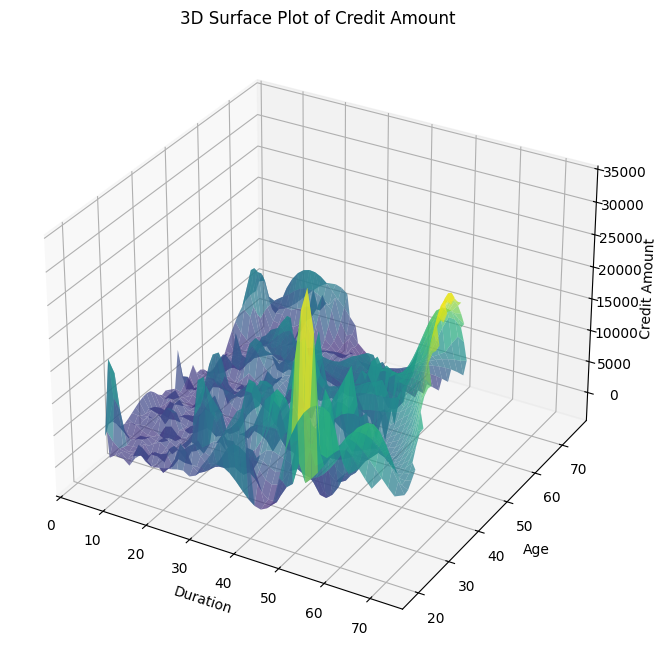

In [137]:
# Prepare grid data for surface plot
xi = np.linspace(min(df1['duration']), max(df1['duration']), 50)
yi = np.linspace(min(df1['age']), max(df1['age']), 50)
zi = griddata((df1['duration'], df1['age']), df1['credit_amount'], (xi[None, :], yi[:, None]), method='cubic')

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
X, Y = np.meshgrid(xi, yi)
ax.plot_surface(X, Y, zi, cmap='viridis', alpha=0.7)

# Set labels
ax.set_xlabel('Duration')
ax.set_ylabel('Age')
ax.set_zlabel('Credit Amount')

# Set title
ax.set_title('3D Surface Plot of Credit Amount')

plt.show()

### **The high peaks indicate combinations of age and duration where the credit amount is significantly high.**
### **Valleys or lower areas indicate combinations where the credit amount is low.**
### **Lighter colors often indicate higher credit amounts, and darker colors indicate lower amounts.**

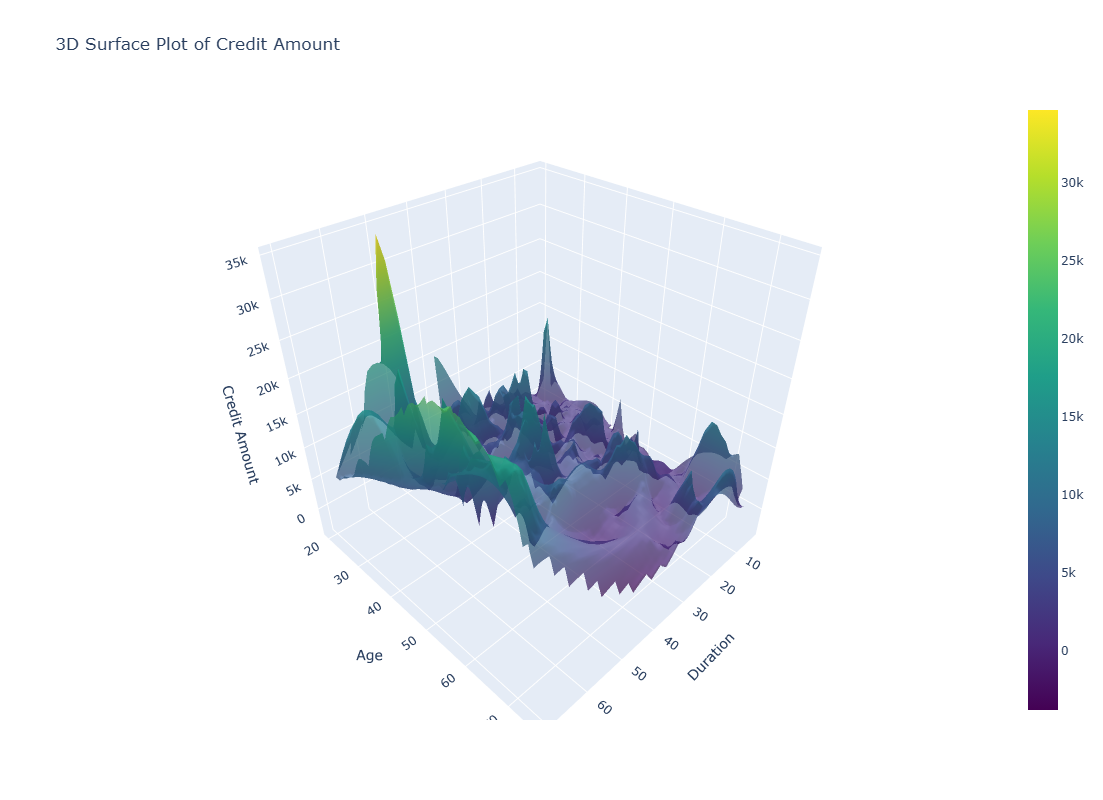

In [138]:
# Prepare grid data for surface plot
xi = np.linspace(min(df1['duration']), max(df1['duration']), 50)
yi = np.linspace(min(df1['age']), max(df1['age']), 50)
zi = griddata((df1['duration'], df1['age']), df1['credit_amount'], (xi[None, :], yi[:, None]), method='cubic')

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, colorscale='Viridis', opacity=0.7)])

# Update layout to make the plot bigger and add labels
fig.update_layout(
    title='3D Surface Plot of Credit Amount',
    scene=dict(
        xaxis_title='Duration',
        yaxis_title='Age',
        zaxis_title='Credit Amount'
    ),
    width=1200,
    height=800
)

# Show plot
fig.show()

In [139]:
features_to_encode = [
    'checking_status', 'credit_history', 'savings_status',
    'employment', 'personal_status', 'other_parties', 
    'property_magnitude', 'other_payment_plans', 'housing', 'job'
]
data_encoded = pd.get_dummies(df1, columns=features_to_encode)
data_encoded = data_encoded.replace({True: 1, False: 0, 'none':0, 'yes':1, 'no':0, 'good':1, 'bad':0})
# Frequency Encoding
data_encoded.loc[:,'purpose'] = data_encoded['purpose'].map(data_encoded['purpose'].value_counts())
print(data_encoded.shape)

(750, 51)


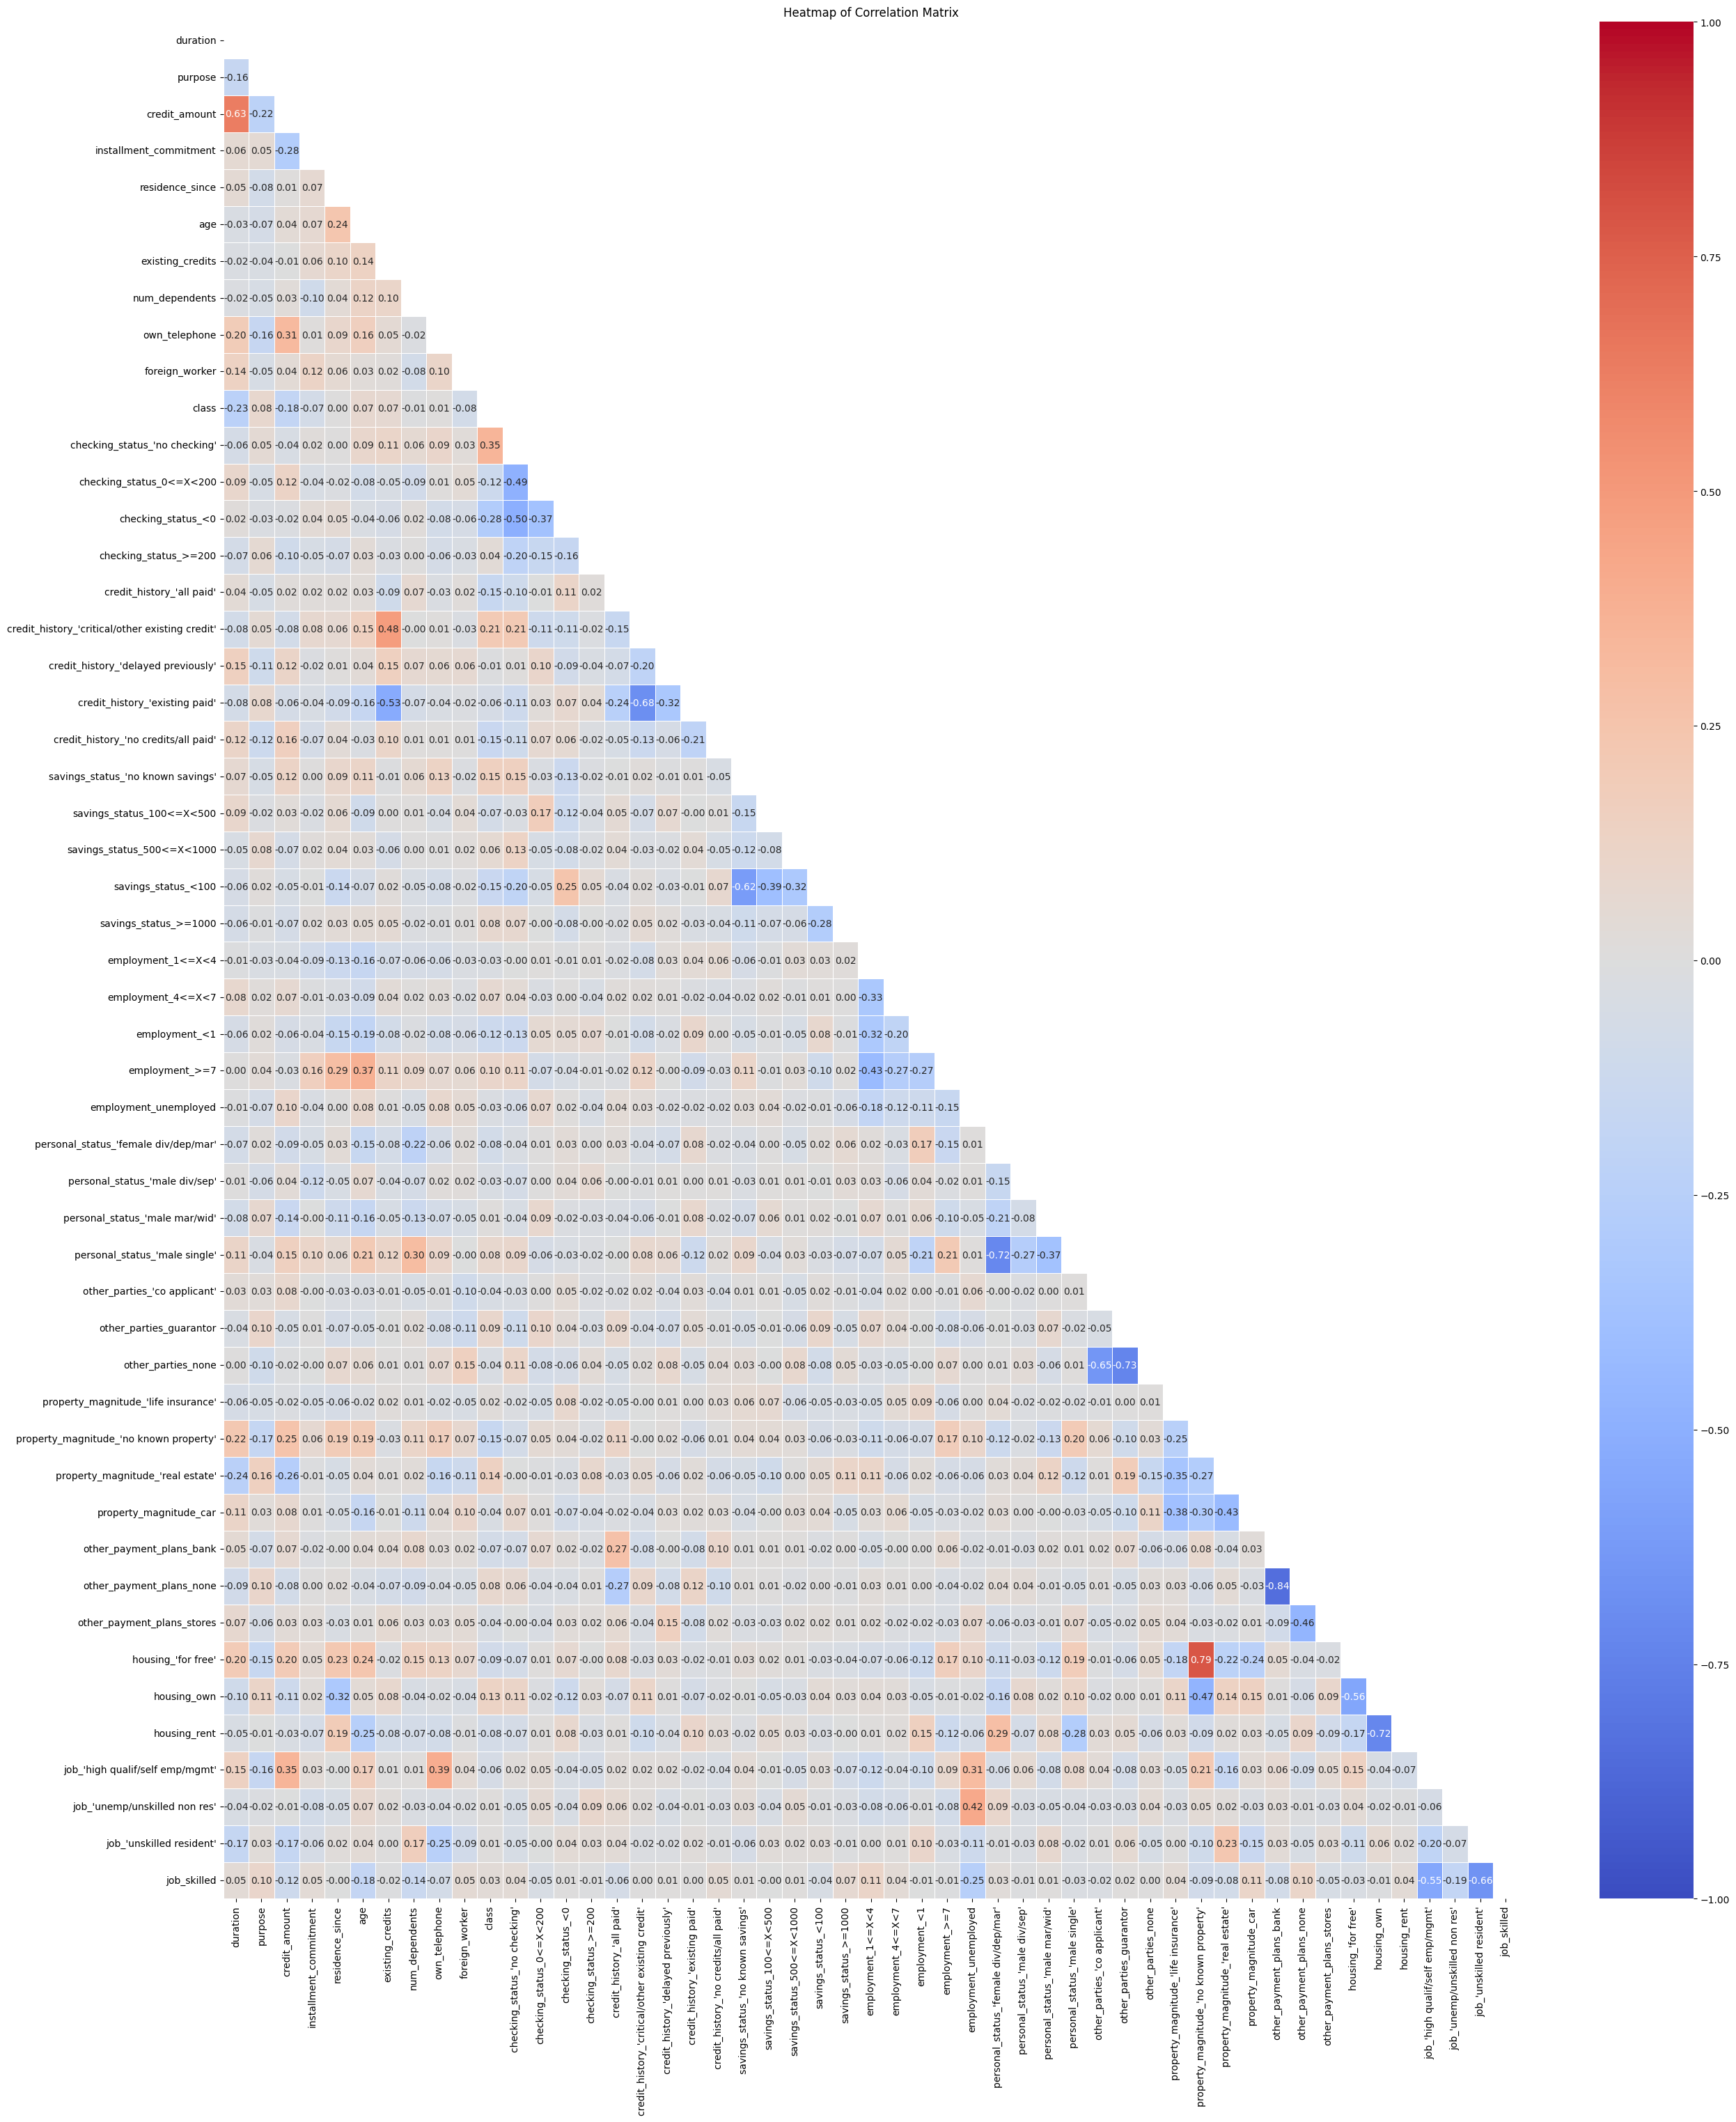

In [140]:
numerical_columns = data_encoded
correlation_matrix = numerical_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(30, 35))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.savefig('Heatmap.jpg')
plt.show()

# **B. Data Pre-Processing**

## **1. Binning Techniques:**

In [141]:
def equi_width_binning(values, n_bins):
    min_val = min(values)
    max_val = max(values)
    width = (max_val - min_val) / n_bins

    bins = [min_val + i * width for i in range(n_bins + 1)]  # calculate bin edges

    # Initialize bins
    binned_values = [[] for _ in range(n_bins)]

    # Assign values to bins
    for val in values:
        for i in range(len(bins) - 1):
            if bins[i] <= val < bins[i + 1] or (i == len(bins) - 2 and val == max_val):
                binned_values[i].append(val)
                break

    # Print the values in each bin
    for i in range(n_bins):
        print(f"Bin {i + 1}: {binned_values[i]}")
        print('--------------------')
        print('--------------------')

In [142]:
equi_width_binning(df1['age'], 3)

Bin 1: [35, 35, 28, 25, 24, 22, 28, 25, 31, 26, 36, 34, 36, 27, 30, 33, 25, 31, 37, 24, 30, 26, 24, 35, 25, 31, 26, 31, 23, 27, 25, 29, 22, 37, 30, 34, 22, 24, 29, 27, 28, 20, 34, 36, 36, 24, 35, 26, 32, 30, 31, 23, 28, 35, 30, 27, 25, 27, 30, 30, 34, 29, 29, 27, 21, 27, 35, 22, 23, 28, 24, 20, 34, 36, 30, 36, 32, 20, 25, 31, 33, 26, 31, 30, 36, 31, 20, 33, 34, 36, 29, 21, 34, 27, 36, 27, 26, 26, 21, 33, 31, 23, 24, 26, 23, 30, 32, 30, 27, 22, 22, 26, 25, 30, 23, 35, 24, 27, 25, 26, 22, 35, 24, 27, 29, 27, 36, 32, 37, 36, 25, 32, 37, 36, 28, 34, 32, 26, 29, 23, 37, 26, 31, 26, 28, 26, 37, 33, 24, 33, 24, 22, 26, 25, 29, 31, 32, 27, 28, 34, 36, 31, 30, 24, 23, 24, 28, 31, 24, 25, 33, 37, 23, 23, 32, 29, 28, 28, 23, 36, 21, 25, 36, 27, 22, 33, 23, 37, 36, 25, 26, 26, 25, 21, 27, 30, 19, 31, 31, 28, 27, 22, 27, 26, 28, 20, 35, 35, 35, 33, 23, 33, 20, 30, 25, 21, 29, 20, 29, 36, 33, 25, 23, 37, 26, 29, 30, 34, 35, 30, 29, 34, 35, 31, 35, 27, 32, 37, 34, 29, 32, 26, 35, 22, 23, 28, 36, 33, 

In [143]:
def equi_depth_binning(values, n_bins):
    sorted_values = sorted(values)  # Step 1
    n_values_per_bin = len(values) // n_bins  # Step 2

    # Initialize bins
    binned_values = [[] for _ in range(n_bins)]

    for i in range(n_bins):  # Step 3
        start_index = i * n_values_per_bin  # Step 4
        if i == n_bins - 1:  # Step 5
            end_index = len(values)
        else:
            end_index = (i + 1) * n_values_per_bin

        for val in sorted_values[start_index:end_index]:  # Step 6
            binned_values[i].append(val)

    # Print the values in each bin
    for i in range(n_bins):
        print(f"Bin {i + 1}: {binned_values[i]}")
        print('--------------------')
        print('--------------------')

In [144]:
equi_depth_binning(df1['age'], 3)

Bin 1: [19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 

## **2. Normalization Techniques:**

In [145]:
def min_max_normalize(values, new_min=0, new_max=1):
    min_val = min(values)
    max_val = max(values)
    normalized_values = [(x - min_val) / (max_val - min_val) * (new_max - new_min) + new_min for x in values]
    return normalized_values

In [146]:
df1['credit_amount_min_max'] = min_max_normalize(df1['credit_amount'], 0.0, 1.0)
df1['credit_amount_min_max']

0      0.419941
1      0.254209
2      0.484483
3      0.368548
4      0.154561
         ...   
745    0.204083
746    0.117751
747    0.030483
748    0.087763
749    0.238032
Name: credit_amount_min_max, Length: 750, dtype: float64

In [147]:
def z_score_normalize(values):
    mean_val = sum(values) / len(values)
    std_dev = (sum([(x - mean_val) ** 2 for x in values]) / len(values)) ** 0.5
    normalized_values = [(x - mean_val) / std_dev for x in values]
    return normalized_values

In [148]:
df1['credit_amount_standard'] = z_score_normalize(df1['credit_amount'])
df1['credit_amount_standard']

0      1.495534
1      0.484610
2      1.889231
3      1.182054
4     -0.123219
         ...   
745    0.178849
746   -0.347757
747   -0.880070
748   -0.530677
749    0.385934
Name: credit_amount_standard, Length: 750, dtype: float64

## **3. Discretization of Age:**

In [149]:
def categorize_age(age):
    if 18 <= age <= 25:
        return 'Teenager'
    elif 26 <= age <= 30:
        return 'Young'
    elif 31 <= age <= 45:
        return 'Mid_Age'
    elif 46 <= age <= 65:
        return 'Mature'
    elif age >= 66:
        return 'Old'
    else:
        return 'Unknown'

In [150]:
df1['age_category'] = df1['age'].apply(categorize_age)
print(df1['age_category'].value_counts()) ; print('----------')
df1['age_category'].head(9)

age_category
Mid_Age     293
Young       162
Teenager    150
Mature      130
Old          15
Name: count, dtype: int64
----------


0     Mid_Age
1      Mature
2     Mid_Age
3     Mid_Age
4      Mature
5       Young
6    Teenager
7    Teenager
8    Teenager
Name: age_category, dtype: object

## **4. Binary Encoding of Categorical Variables: (Convert the "Purpose" variable into binary variables)**

In [151]:
df1 = pd.get_dummies(df1, columns=['purpose'], prefix='purpose', drop_first=False)
df1 = df1.astype({col: 'int' for col in df1.select_dtypes(include=['bool']).columns})
df1.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,credit_amount_min_max,credit_amount_standard,age_category,purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining
0,<0,42,'existing paid',7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good,0.419941,1.495534,Mid_Age,0,0,0,0,0,1,0,0,0,0
1,<0,24,'delayed previously',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad,0.254209,0.484610,Mature,0,1,0,0,0,0,0,0,0,0
2,'no checking',36,'existing paid',9055,'no known savings',1<=X<4,2,'male single',none,4,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good,0.484483,1.889231,Mid_Age,0,0,0,0,1,0,0,0,0,0
3,0<=X<200,36,'existing paid',6948,<100,1<=X<4,2,'male single',none,2,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good,0.368548,1.182054,Mid_Age,0,0,1,0,0,0,0,0,0,0
4,'no checking',12,'existing paid',3059,>=1000,4<=X<7,2,'male div/sep',none,4,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good,0.154561,-0.123219,Mature,0,0,0,0,0,0,0,1,0,0


In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   checking_status               750 non-null    object 
 1   duration                      750 non-null    int64  
 2   credit_history                750 non-null    object 
 3   credit_amount                 750 non-null    int64  
 4   savings_status                750 non-null    object 
 5   employment                    750 non-null    object 
 6   installment_commitment        750 non-null    int64  
 7   personal_status               750 non-null    object 
 8   other_parties                 750 non-null    object 
 9   residence_since               750 non-null    int64  
 10  property_magnitude            750 non-null    object 
 11  age                           750 non-null    int64  
 12  other_payment_plans           750 non-null    object 
 13  housi

## **5. Data reduction:**

In [153]:
numerical_features = df1.select_dtypes(include=['int32', 'float64', 'int64']).columns
categorical_features = df1.select_dtypes(include=['object']).columns

# Preprocessing: Encode categorical and boolean features, and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
    ])
df1_processed = preprocessor.fit_transform(df1)

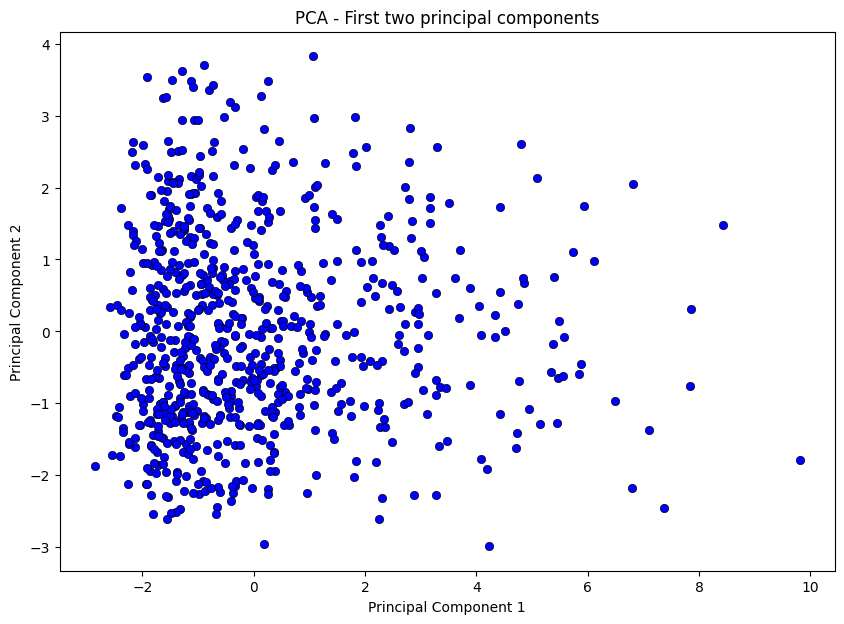

In [154]:
# Apply PCA
pca = PCA(n_components=10)
pca_components = pca.fit_transform(df1_processed)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(10)])

# Visualize the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, c='b', edgecolor='k')
plt.title('PCA - First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [155]:
pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.954324,0.108926,1.614493,-0.623023,0.047934,-0.661723,0.101177,-0.900542,0.288578,0.467877
1,1.088550,2.971747,1.222886,0.732246,-0.461101,0.706446,0.320546,-0.616434,-0.405345,-0.226667
2,3.697545,1.129137,0.370856,-1.047174,-1.001588,1.443340,-2.129542,-3.029128,0.458588,1.546293
3,3.045293,-0.808556,0.036536,-0.220143,-1.149295,-1.442240,-1.637938,0.569931,0.043020,-0.266831
4,-0.725078,0.885016,-0.918261,-0.048791,-1.234635,-0.901103,0.812150,0.283047,0.030312,0.202156
5,1.005912,0.098905,0.241884,1.081161,0.042493,1.296004,0.765094,0.064691,-0.509754,-0.542712
6,-1.509778,-1.266319,1.361859,1.197225,-1.087565,1.403313,0.002736,-0.022504,-0.401573,-0.319959
7,1.402512,-1.413719,-0.339392,-0.344581,1.686549,1.790835,-0.954794,0.638994,-1.292722,-0.115070
8,-1.328502,-2.464505,-0.490265,1.479707,-0.895204,-0.610723,-0.020904,-0.279037,0.156221,0.339408
9,-1.068608,2.933291,0.319941,-0.342928,-0.090280,0.944934,1.174386,0.485841,-0.764287,-0.537133


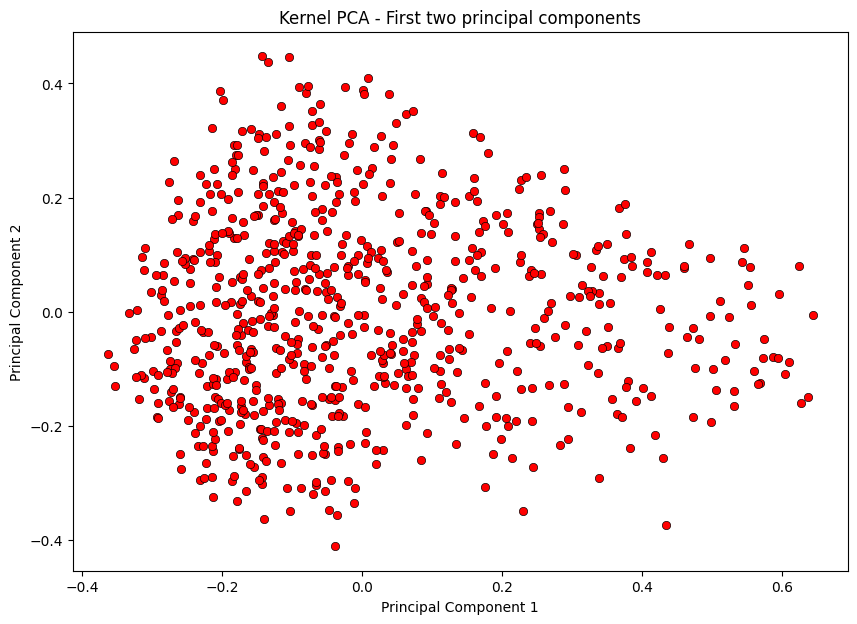

In [156]:
# Apply Kernel PCA
kpca = KernelPCA(n_components=10, kernel='rbf', fit_inverse_transform=True)
kpca_components = kpca.fit_transform(df1_processed)

# Create a DataFrame with the principal components
kpca_df = pd.DataFrame(data=kpca_components, columns=[f'PC{i+1}' for i in range(10)])

# Visualize the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=kpca_df, c='r', edgecolor='k')
plt.title('Kernel PCA - First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [157]:
kpca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.337159,-0.108009,-0.136600,-0.084674,-0.062284,-0.029609,0.057545,-0.238036,0.211992,-0.097491
1,0.157957,0.313783,-0.151270,-0.156539,0.096093,0.007625,-0.049463,-0.141936,0.107053,-0.007519
2,0.433156,0.063834,0.009487,0.121983,0.004048,-0.175399,-0.025981,-0.062231,0.365400,0.127751
3,0.364450,-0.179674,0.085197,-0.234720,-0.002783,-0.135262,0.112087,0.210678,-0.021276,0.066156
4,-0.112532,0.124106,0.138865,-0.075154,-0.085187,-0.092539,0.116824,-0.132187,0.059588,-0.257435
5,0.083434,0.023453,-0.034372,-0.110736,0.192120,0.094228,-0.230193,-0.037068,-0.178839,0.215636
6,-0.197340,-0.072408,-0.150049,0.016401,0.322503,-0.093893,-0.152343,0.109904,-0.098782,0.062883
7,0.166271,-0.165273,0.019199,0.091298,0.026502,0.214850,-0.257891,0.217594,0.082752,-0.217878
8,-0.212394,-0.244783,0.144418,0.057040,0.216428,-0.063074,0.152905,0.014708,-0.025351,-0.009996
9,-0.090344,0.394388,-0.115464,-0.115104,-0.066847,0.034580,-0.188257,-0.074206,-0.099119,0.002060


### Compare between PCA and KPCA

Explained Variance Ratio for PCA: [0.15035221 0.07192998 0.05649565 0.04929967 0.04738435 0.04504048
 0.04245139 0.04067853 0.04007729 0.03943141]
Reconstruction Error for PCA: 0.15580957544778154
Reconstruction Error for KPCA: 0.2571186832320826


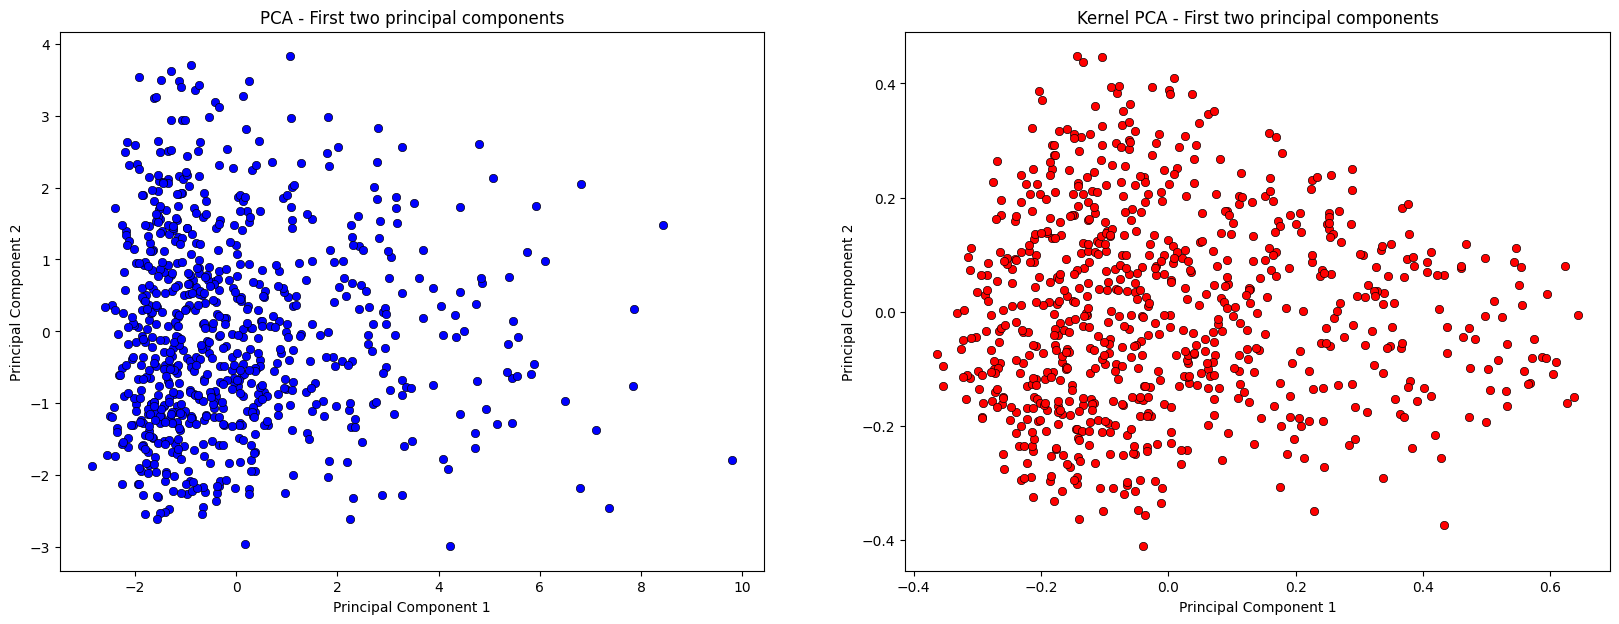

In [158]:
# Calculate reconstruction error for PCA
pca_reconstructed = pca.inverse_transform(pca_components)
pca_reconstruction_error = mean_squared_error(df1_processed, pca_reconstructed)

# Calculate reconstruction error for KPCA
kpca_reconstructed = kpca.inverse_transform(kpca_components)
kpca_reconstruction_error = mean_squared_error(df1_processed, kpca_reconstructed)

# Print explained variance ratio for PCA
print("Explained Variance Ratio for PCA:", pca.explained_variance_ratio_)

# Print reconstruction errors
print("Reconstruction Error for PCA:", pca_reconstruction_error)
print("Reconstruction Error for KPCA:", kpca_reconstruction_error)

pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(10)])
kpca_df = pd.DataFrame(data=kpca_components, columns=[f'PC{i+1}' for i in range(10)])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plot PCA results
sns.scatterplot(x='PC1', y='PC2', data=pca_df, ax=axes[0], c='b', edgecolor='k')
axes[0].set_title('PCA - First two principal components')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot KPCA results
sns.scatterplot(x='PC1', y='PC2', data=kpca_df, ax=axes[1], color='r', edgecolor='k')
axes[1].set_title('Kernel PCA - First two principal components')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Show the plots
plt.show()

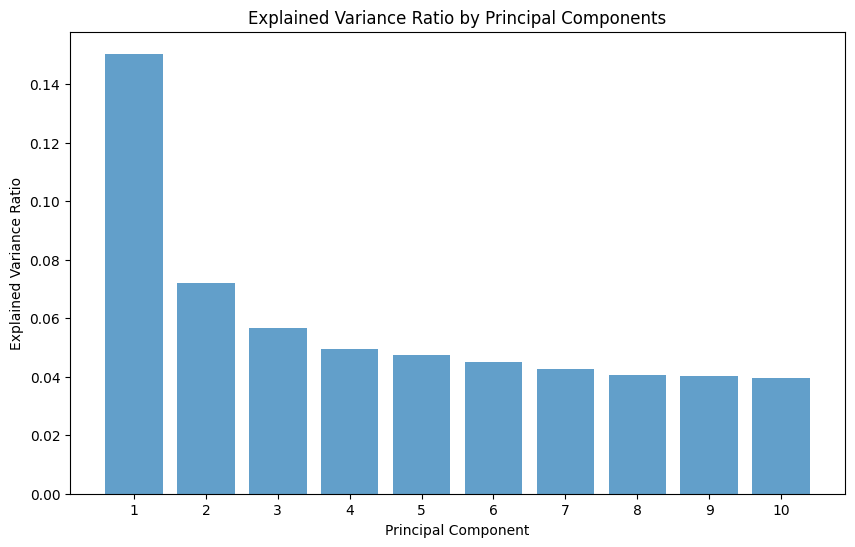

In [159]:
# Visualize the explained variance ratio for PCA
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 11))
plt.show()

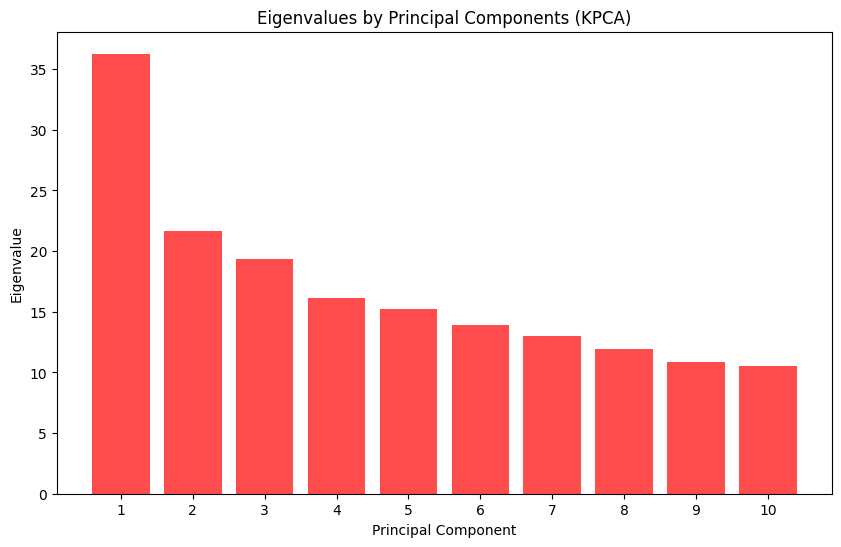

In [160]:
# Visualize the eigenvalues for KPCA
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), kpca.eigenvalues_, alpha=0.7, align='center', color='r')
plt.title('Eigenvalues by Principal Components (KPCA)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, 11))
plt.show()

### **conclusion:**
#### **Explained Variance Ratio: PCA provides a clear indication of how much variance each component captures. The first few components capture a substantial amount of variance, which is a good sign.**
#### **Reconstruction Error: PCA has a significantly lower reconstruction error compared to KPCA, indicating that PCA is better at reconstructing the original data from the reduced components.**
#### **`PCA appears to be the better choice`**

# **C. Association Rules Mining**

## **Import Data**

In [161]:
df2 = pd.read_csv('Community-Participation-DataSet(3).csv')

In [162]:
df2.head()

,Record#,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,1,8.17,Medium,M,Yes,36,Yes,No,Yes,No,No,No,No
1,2,2.80,Medium,F,Yes,54,Yes,No,No,No,No,Yes,No
2,3,8.68,Medium,F,No,18,Yes,No,No,No,No,No,No
3,4,2.27,Medium,F,No,53,Yes,No,No,No,Yes,No,No
4,5,8.89,Short,F,Yes,31,No,No,No,No,No,No,No


In [163]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record#            2000 non-null   int64  
 1   Elapsed_Time       2000 non-null   float64
 2   Time_in_Community  2000 non-null   object 
 3   Gender             2000 non-null   object 
 4   Working            2000 non-null   object 
 5   Age                2000 non-null   int64  
 6   Family             2000 non-null   object 
 7   Hobbies            2000 non-null   object 
 8   Social_Club        2000 non-null   object 
 9   Political          2000 non-null   object 
 10  Professional       2000 non-null   object 
 11  Religious          2000 non-null   object 
 12  Support_Group      2000 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 203.3+ KB


### The data is clean too 😋

In [164]:
df2 = df2.drop(columns=['Record#'])
df2.isnull().sum()

Elapsed_Time         0
Time_in_Community    0
Gender               0
Working              0
Age                  0
Family               0
Hobbies              0
Social_Club          0
Political            0
Professional         0
Religious            0
Support_Group        0
dtype: int64

In [165]:
df2[df2.duplicated() == True]

,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
530,8.71,Medium,M,No,42,No,No,No,No,No,No,No


In [166]:
df2 = df2.drop_duplicates()

## **1. Extract and Evaluate Associations:**

In [167]:
def categorize_age(age):
    if 18 <= age <= 25:
        return 'Teenager'
    elif 26 <= age <= 30:
        return 'Young'
    elif 31 <= age <= 45:
        return 'Mid_Age'
    elif 46 <= age <= 65:
        return 'Mature'
    elif age >= 66:
        return 'Old'
    else:
        return 'Unknown'

df2['Age'] = df2['Age'].apply(categorize_age)

In [168]:
df2 = pd.get_dummies(data=df2, columns=['Time_in_Community', 'Age', 'Gender'])
convert_values = {'Yes':True, 'No':False}
df2 = df2.replace(convert_values)

In [169]:
df2 = df2.drop(columns=['Elapsed_Time'])
df2.head()

,Working,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group,Time_in_Community_Long,Time_in_Community_Medium,Time_in_Community_Short,Age_Mature,Age_Mid_Age,Age_Teenager,Age_Unknown,Age_Young,Gender_F,Gender_M
0,True,True,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True
1,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False
3,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [170]:
# Apriori Algorithm
frequent_itemsets_apriori = apriori(df2, min_support=0.1, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)
rules_apriori_sorted = rules_apriori.sort_values(by=['confidence'], ascending=[False])

print("Apriori Rules:")
rules_apriori_sorted.head(8)

Apriori Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
120,"(Social_Club, Hobbies)",(Religious),0.121561,0.421711,0.110555,0.909465,2.156608,0.059292,6.387466,0.610525
92,"(Family, Hobbies)",(Religious),0.188594,0.421711,0.159580,0.846154,2.006479,0.080048,3.758879,0.618204
104,"(Family, Social_Club)",(Religious),0.124062,0.421711,0.103052,0.830645,1.969703,0.050733,3.414660,0.562037
130,"(Gender_M, Hobbies)",(Religious),0.146573,0.421711,0.121061,0.825939,1.958542,0.059249,3.322328,0.573472
72,"(Working, Hobbies)",(Religious),0.153077,0.421711,0.125063,0.816993,1.937331,0.060508,3.159937,0.571275
31,(Social_Club),(Religious),0.186093,0.421711,0.150575,0.809140,1.918708,0.072098,3.029909,0.588293
25,(Hobbies),(Religious),0.301651,0.421711,0.243622,0.807629,1.915124,0.116412,3.006107,0.684243
125,"(Gender_F, Hobbies)",(Religious),0.155078,0.421711,0.122561,0.790323,1.874086,0.057163,2.757994,0.552011


In [171]:
# FP-Growth Algorithm
patterns = fpgrowth(df2, min_support=0.1, use_colnames=True)
rules_fpgrowth = association_rules(patterns, metric="confidence", min_threshold=0.7)
rules_fpgrowth_sorted = rules_fpgrowth.sort_values(by=['confidence'], ascending=[False])
# Print the FP-Growth rules
print("FP-Growth Rules:")
rules_fpgrowth_sorted

# for index, rule in rules_fpgrowth.iterrows():
#     antecedents = ', '.join(list(rule['antecedents']))
#     consequents = ', '.join(list(rule['consequents']))
#     print(f"Rule: {antecedents} -> {consequents}")

FP-Growth Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(Social_Club, Hobbies)",(Religious),0.121561,0.421711,0.110555,0.909465,2.156608,0.059292,6.387466,0.610525
5,"(Family, Hobbies)",(Religious),0.188594,0.421711,0.159580,0.846154,2.006479,0.080048,3.758879,0.618204
1,"(Family, Social_Club)",(Religious),0.124062,0.421711,0.103052,0.830645,1.969703,0.050733,3.414660,0.562037
8,"(Gender_M, Hobbies)",(Religious),0.146573,0.421711,0.121061,0.825939,1.958542,0.059249,3.322328,0.573472
7,"(Working, Hobbies)",(Religious),0.153077,0.421711,0.125063,0.816993,1.937331,0.060508,3.159937,0.571275
0,(Social_Club),(Religious),0.186093,0.421711,0.150575,0.809140,1.918708,0.072098,3.029909,0.588293
4,(Hobbies),(Religious),0.301651,0.421711,0.243622,0.807629,1.915124,0.116412,3.006107,0.684243
6,"(Gender_F, Hobbies)",(Religious),0.155078,0.421711,0.122561,0.790323,1.874086,0.057163,2.757994,0.552011
2,"(Religious, Social_Club)",(Hobbies),0.150575,0.301651,0.110555,0.734219,2.434004,0.065134,2.627539,0.693592


## **Explaining**
#### **I'll explain the maximum value only; the rest of the values are the same. As you can see, the support is 11%, which means that 11% of the whole dataset is in the three communities (Social_Club, Hobbies, Religious). The confidence is 90%, which means that 90% of the people in (Social_Club, Hobbies) are also in (Religious).**

In [172]:
eclat_data = [[i for i in df2.columns if df2.at[index, i]] for index, row in df2.iterrows()]
eclat = pd.DataFrame(eclat_data)
eclat

,0,1,2,3,4,5,6,7,8,9,10
0,Working,Family,Social_Club,Time_in_Community_Medium,Age_Mid_Age,Gender_M,None,None,None,None,None
1,Working,Family,Religious,Time_in_Community_Medium,Age_Mature,Gender_F,None,None,None,None,None
2,Family,Time_in_Community_Medium,Age_Teenager,Gender_F,None,None,None,None,None,None,None
3,Family,Professional,Time_in_Community_Medium,Age_Mature,Gender_F,None,None,None,None,None,None
4,Working,Time_in_Community_Short,Age_Mid_Age,Gender_F,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1994,Working,Time_in_Community_Medium,Age_Mature,Gender_M,None,None,None,None,None,None,None
1995,Hobbies,Religious,Time_in_Community_Long,Age_Mature,Gender_M,None,None,None,None,None,None
1996,Working,Time_in_Community_Long,Age_Young,Gender_M,None,None,None,None,None,None,None
1997,Family,Hobbies,Support_Group,Time_in_Community_Medium,Age_Mid_Age,Gender_M,None,None,None,None,None


In [173]:
eclat = ECLAT(data=eclat, verbose=True)
eclat.df_bin # convert the data to oneHotEncoding

100%|██████████| 19/19 [00:00<00:00, 1732.24it/s]


,Family,Time_in_Community_Medium,Political,Gender_M,Religious,Age_Unknown,None,Gender_F,Hobbies,Support_Group,Age_Mid_Age,Age_Mature,Age_Teenager,Time_in_Community_Short,Age_Young,Professional,Time_in_Community_Long,Working,Social_Club
0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1995,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1997,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0


In [174]:
index, support= eclat.fit(min_support=0.1, min_combination=2, max_combination=5, verbose=True)
# index : have the itemsets and its frequency
# support : have the itemsets and its support
itemsets = list(support.keys())
values = support.values()

Combination 2 by 2


136it [00:00, 156.47it/s]


Combination 3 by 3


680it [00:03, 190.86it/s]


Combination 4 by 4


2380it [00:12, 183.98it/s]


Combination 5 by 5


6188it [00:37, 163.79it/s]


In [175]:
Freq_itemset = pd.DataFrame({'support':values, 'itemsets':itemsets})
Freq_itemset['itemsets'] = Freq_itemset['itemsets'].map(lambda x: frozenset(x.split(' & ')))
# we did frozenset because the association rule accept only the frozenset.
association_ECLAT = association_rules(Freq_itemset, support_only=True, min_threshold=0.1)
association_ECLAT_sorted = association_ECLAT.sort_values(by=['support'], ascending=[False])

In [176]:
Freq_itemset.head()

,support,itemsets
0,0.146073,"(Family, Time_in_Community_Medium)"
1,0.194597,"(Family, Gender_M)"
2,0.229115,"(Religious, Family)"
3,0.207104,"(Family, Gender_F)"
4,0.188594,"(Family, Hobbies)"


In [177]:
association_ECLAT_sorted.head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
77,(Working),(Gender_F),NaN,NaN,0.255128,NaN,NaN,NaN,NaN,NaN
76,(Gender_F),(Working),NaN,NaN,0.255128,NaN,NaN,NaN,NaN,NaN
47,(Gender_M),(Working),NaN,NaN,0.246623,NaN,NaN,NaN,NaN,NaN
46,(Working),(Gender_M),NaN,NaN,0.246623,NaN,NaN,NaN,NaN,NaN
51,(Hobbies),(Religious),NaN,NaN,0.243622,NaN,NaN,NaN,NaN,NaN
50,(Religious),(Hobbies),NaN,NaN,0.243622,NaN,NaN,NaN,NaN,NaN
4,(Religious),(Family),NaN,NaN,0.229115,NaN,NaN,NaN,NaN,NaN
5,(Family),(Religious),NaN,NaN,0.229115,NaN,NaN,NaN,NaN,NaN
